<img src="scikit_learn_logo.png">

## ¿Qué es Machine Learning?

Es la ciencia que consiste en programar ordenadores para que puedan **aprender** de los datos y puedan tomar decisiones.

Un ejemplo sería el un filtro de correos spam. Este filtro es un programa de machine learning que ha sido entrenado con muestras de correos de ambos tipos, de tal forma que, cuando se recibe un correo nuevo (diferente de los que ya conoce), es capaz de clasificarlo en el grupo que corresponde, spam o no spam.

## Scikit-learn

Es una librería de Python enfocada en resolver problemas de machine learning. Esta pensada para ser fácil de usar y ser eficiente. Tiene implementados los principales algoritmos de machine learning (supervisados y no supervisados), sistemas de evaluación, etc.

Trabaja perfectamente junto con las librerías cientificas Pandas, NumPy y SciPy. Además existe numera documentación sobre la misma, está en permanente progreso y tiene una numerosa comunidad detrás.

## ¿Qué te vas a encontar a lo largo de esta guía?
Los conceptos más importantes sobre los principales algoritmos de clasificación y regresión que se utilizan en la actualidad para resolver problemas de machine learning.

Además de estos conceptos, vamos a ir desarrollando ejemplos con bases de datos obtenidas de varias fuentes con las que vamos a poner en practica la teoría.

<img src='REGRESION LINEAL.png'>

## Regresión Lineal


El objetivo de un modelo de regresión es explicar la relación que existe entre una **variable dependiente** u **objetivo**  y un conjunto de variables **independientes** o **explicativas**. La expresión matématica tiene la forma:

$$
Y = \alpha + \beta_{0} X_{0} + \beta_{1} X_{1} + \beta_{2} X_{2} + ... + \beta_{n} X_{n} +\epsilon
$$

En donde:

- **Alpha** es la ordenada en el origen, el valor que toma la variable objetivo cuando todas las variables explicativas son = 0.

- **Beta** es la relación que existe entre la variable objetivo y la variable explicativa en cuestiíon.

- **Epsilon** es la variable que engloba una serie de factores no controlables a priori por nosotros, lo llamaremos **error**.

En resumen, cuando queremos crear un modelo aplicando la técnica de regresión lineal, lo que hacemos es estimar los valores de **alpha** y **beta**.

Vamos a utilizar una base de datos para explicar los pasos que se siguen en este tipo de problemas. Comenzamos!


In [72]:
import pandas as pd
import numpy as np
# regresion lineal de scikit-learn
from sklearn.linear_model import LinearRegression   
# función para separar set entrenamiento - testeo
from sklearn.model_selection import train_test_split 
# métrica para medir la bondad del modelo
from sklearn.metrics import r2_score, mean_squared_error                  
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
import os



In [6]:
# importamos la base de datos de coches
csv_path = os.path.join(os.getcwd(), '..', 'datasets', 'Coches', 'coches.csv')
coches_df = pd.read_csv(csv_path)
coches_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Lo primero que vamos a hacer, antes de analizar nada es separar **set de entrenamiento** y **set de testeo**:
- set de entrenamiento: el que usaremos durante el ejercicio para generar nuestro modelo
- set de testeo: el que usaremos para testear finalmente el rendimiento del modelo antes de llevarlo a producción.
        
    
Uno de los barreras que nos vamos a encontrar generalmente en los problemas de machine learning es la cantidad de datos con los cuales contamos para generar nuestro modelo.

Lo más normal es utilizar un 70% de los datos para entrenamiento y el 30% restante para el testeo. 

Scikit learn nos proporciona una función para separar ambos conjuntos de datos: **train_test_split**.

In [12]:
# random_state es una semilla que se pasa para poder hacer siempre la misma separación con estos datos
# esto es necesario ya que esta función trabaja de forma aleatoria
train, test = train_test_split(coches_df, test_size = 0.3, random_state = 42)

print(f'Dimensiones de coches_df: {coches_df.shape}')
print(f'Dimensiones de train: {train.shape}')
print(f'Dimensiones de test: {test.shape}')

Dimensiones de coches_df: (205, 26)
Dimensiones de train: (143, 26)
Dimensiones de test: (62, 26)


Ya podemos empezar a analizar nuestros datos a partir del set de entrenamiento, del set de testeo nos olvidamos hasta el final del ejercicio. Nuestra variable objetivo, la que vamos a querer predecir con el modelo que creemos, será el precio del coche: **price**.
    
Nos quedaría saber que variable o variables vamos a utilizar como las explicativas, para ello, vamos a ver la **matriz de correlación**.
    
Con ello conseguimos ver no solo cuales son las variables que más relacionadas estás con *score* si no también que variables están muy relacionadas entre sí. Esto es importante ya que nos interesa que estas sean **independientes**.

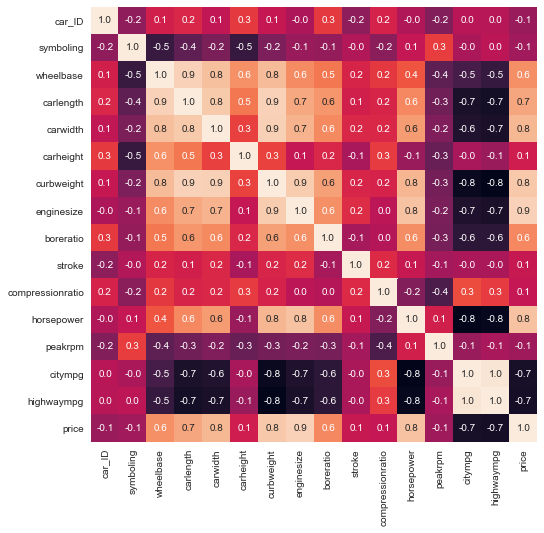

In [21]:
# nos da el indice de correlacion de pearson de las variables numéricas 
matriz_correlacion = coches_df.corr(method = 'pearson')   

# si tienes dudas sobre esto, echa un vistazo al tutorial de seaborn donde lo explico
figure = plt.figure(figsize = (8,8))
sns.heatmap(matriz_correlacion, fmt = '.1f', annot = True, cbar = False);

Parece que las variables que más **relación lineal** tienen con el precio (nos lo dice el **índice de correlacion de pearson**, son:
- carwidth
- curbweight
- enginesize
- horsepower

Vamos a resolver primero el ejercicio utilizando solo una de ellas, para acotar el problema a 2 dimensiones, **regresión lineal simple**, y que las gráficas que dibujemos sean sencillas de entender y, más adelante resolveremos de nuevo el problema haciendo uso del resto. Nos vamos a quedar entonces solo con **enginesize**.

Con un gráfico de dispersión podemos ver la relación de estas dos variables en el plano:

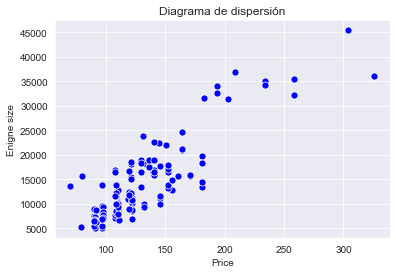

In [20]:
sns.scatterplot(data = train, x = 'enginesize', y = 'price', color = 'blue', s = 50)
plt.title('Diagrama de dispersión')
plt.ylabel('Engine size')
plt.xlabel('Price');

Parece bastante claro que estas dos variables presentan una relación lineal. Veamos ahora como es la distribución de ambas variables:

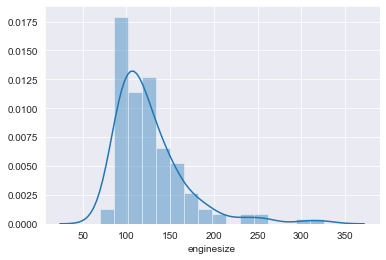

In [42]:
# histograma variable explicativa
sns.distplot(train['enginesize']);

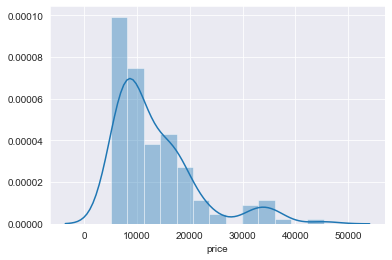

In [43]:
# histograma variable objetivo
sns.distplot(train['price']);

Podemos ver como en ambos casos aparecen valores atípicos, sin embargo conservan la naturaleza lineal del resto de la distribución. Por este motivo, **para este caso en concreto**, no es necesario deshacerse de ellos.

No obstante es imprescindible hacer esta comprobación en cualquier modelo de estas características. Obviar este paso y entrenar el modelo con valores atípicos puede arruinar el resto de trabajo.

Vamos a generar el modelo y entrenarlo:


In [44]:
# fit_intercept: calcular el termino alpha. En caso negativo se asume que los datos están centrados

# normalize: se normalizan las variables explicativas antes de entrenar el modelo
# para este caso, tratándose de un problema de regresión simple simple no será necesario

# n_jobs: parametro que permite paralelizar el entrenamieto, en este caso no es neceasario aumentarlo
regresion_lineal_simple = LinearRegression(fit_intercept = True, normalize = False, n_jobs = 1)


In [56]:
X_train = train['enginesize']
y_train = train['price']
X_test = test['enginesize']
y_test = test['price']

Entrenamos el modelo con la función **fit()**:

In [57]:
# .values.reshape(-1,1): obtengo primero el numpy array asociado a la Series de Pandas y después
# lo convierto en vector columna (que es lo que pide sklearn para entrenar modelos)
regresion_lineal_simple.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

Con el modelo ya generado, es hora de ver que tal funciona, vamos a predecir los datos guardados para el testeo haciendo uso de la función **predict()**:

In [60]:
y_predicciones = regresion_lineal_simple.predict(X_test.values.reshape(-1,1));

Al tener los datos reales (y_test) y los que acabamos de predecir, podemos ver cual es la diferencia existente entre ambos como una aproximación sobre la bondad del modelo. Para calcular esta diferencia vamos a usar **la raíz del error cuadrático medio**:

In [73]:
mean_squared_error( y_true = y_test,          # valores reales
                    y_pred = y_predicciones,  # valores predichos
                    squared = False,          # para calcular la raíz (mantenemos unidades)
                    )

4132.707975899924

Vemos que ya de entrada con esta métrica podemos ver que el modelo no es del todo fino, probablemente la variable *enginesize* no sea lo suficientemente explicativa.

Veamos cuanto nos da el estadistico **R cuadrado**, el cual básicamente sirve para cuantificar como de bien cierta variable explica la varianza de la variable objetivo:

In [75]:
# un modelo perfecto daría lugar a r2_score = 1
r2_score( y_true = y_test,         # valores reales
         y_pred = y_predicciones   # valores predichos
         )

0.7534902447506853

Aprovechando que el problema lo hemos resuelto con una variable, vamos a ver ahora el resultado en un gráfico. Para ello mostraremos la recta que hemos modelado, recuerda la expresión matemática del comienzo de la guía, y los valores reales:

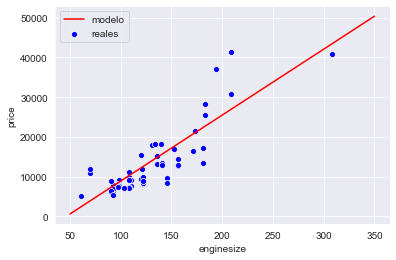

In [79]:
# alpha = intercept_
alpha = regresion_lineal_simple.intercept_

# coef_ es una lista que contiene todas las betas, en este caso solo hay 1
beta = regresion_lineal_simple.coef_[0]

x_recta = np.linspace(50, 350, 2)
sns.lineplot(x = x_recta, y = (x_recta * beta) + alpha, color = 'red', label = 'modelo')

sns.scatterplot(X_test, y_test, label = 'reales', markers = 'o', color = 'blue')
plt.legend();

Es momento de resolver el mismo problema pero haciendo uso de más variables explicativas, para sacarle mayor partido al algoritmo, con esto seguramente seamos capaces de mejorar la capacidad regresora del modelo.

Pasamos entonces a un modelo de **regresión lineal múltiple**.

Para elegir las variables vamos a filtrar "manualmente": primero nos quedaremos con las variables que tengan un índice de correlación de pearson > |0.5|. Después nos quedaremos con las variables que mayor correlación tengan con la objetivo y a su vez sean lo suficientemente independientes.

Existen muchas formas de realizar una selección de variables, y esto se escapa del objetivo de esta guía, por lo que se explicará en otro capítulo.

In [98]:
var_potenciales = matriz_correlacion.loc[np.abs(matriz_correlacion['price']) > 0.5, 'price']
print(np.abs(var_potenciales).sort_values(ascending = False))

price         1.000000
enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
highwaympg    0.697599
citympg       0.685751
carlength     0.682920
wheelbase     0.577816
boreratio     0.553173
Name: price, dtype: float64


In [93]:
var_potenciales.index.tolist().remove('price')

Calculamos de nuevo la matriz de correlacion pero esta vez solo con las potenciales variables explicativas que acabamos de obtener:

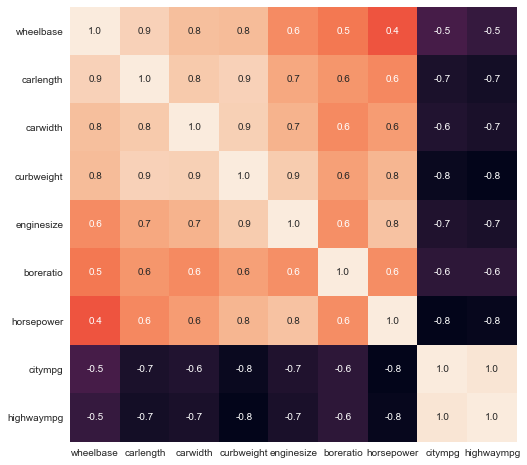

In [94]:
# obtenemos las columnas en forma de lista y quitamos price
columnas = var_potenciales.index.tolist()
columnas.remove('price')

matriz_correlacion_exp = coches_df[columnas].corr(method = 'pearson') 

figure = plt.figure(figsize = (8,8))
sns.heatmap(matriz_correlacion_exp, annot = True, fmt = '.1f', cbar = False);

Finalmente decidimos quedarnos con las siguientes:
- enginesize
- curbweight
- horsepower
- highwaympg
- wheelbase
- boreratio

Repetimos el proceso de entrenamiento y predicción y veamos cual es el resultado:

In [163]:
variables_expli = ['enginesize', 'curbweight', 'horsepower', 'highwaympg', 'wheelbase','boreratio']

X_train = train[variables_expli]
y_train = train['price']
X_test = test[variables_expli]
y_test = test['price']

regresion_lineal_mult = LinearRegression()
# en este caso no es necesario redimensionar X (es una matriz)
regresion_lineal_mult.fit(X_train, y_train.values.reshape(-1,1))
y_predicciones_2 = regresion_lineal_mult.predict(X_test);

Wall time: 7 ms


In [164]:
mean_squared_error( y_true = y_test,          
                    y_pred = y_predicciones_2, 
                    squared = False,          
                    )

3893.392800293985

Hemos mejorado algo esta métrica, a ver que ha pasado con R cuadrado:


In [165]:
r2_score( y_true = y_test,         
         y_pred = y_predicciones_2   
         )

0.7812131998407834

Como era de esperar hemos conseguido mejorar algo el modelo, el estadístico R cuadrado nos dice que estas variables explican mejor la varianza de *price* que el caso anterior.

Es necesario recalcar, que para validar de manera correcta un modelo de regresión lineal, es necesario hacer un **análisis sobre los residuos** de las predicciones (los errores que se cometen) y ver que cumplen ciertas propiedades como la homocedasticidad, independencia, y normalidad.

El objetivo de esta guía no es lograr un modelo perfecto, o entrar en un análisis estadístico profundo sobre los resultados y calculos intermedios. Esto se hará en una guía distinta haciendo uso de una librería preparada para ello: **statsmodels**. 

Ahora hemos visto una manera rápida y sencilla de entrenar  y testear un modelo de regresión lineal con la librería **scikit learn**. Tener en cuenta que existen muchas maneras de resolver este tipo de problemas, como puede ser **SGDRegressor**, que es un algoritmo de optimización y suele emplearse en problemas en los que se trabaja con muchisimas variables y permite además aplicar cierta regularización. En este tema ya entraremos más adelante!

